**## Likely Time-Based Columns**

1. **Avg. Session Length** (34.49, 31.92, etc.)
   - Unit: **Minutes**
   - Rationale: Typical web sessions are measured in minutes (30-35 mins aligns with common user behavior).

2. **Time on App** (12.65, 11.33, etc.)
   - Unit: **Minutes**
   - Rationale: Values ≈12-13 would be implausibly low for hours (e.g., 12 hours/day) but reasonable for daily app usage in minutes.

3. **Time on Website** (39.57, 37.26, etc.)
   - Unit: **Minutes**
   - Rationale: Similar to app time, these values align better with minutes than hours for website engagement.

4. **Length of Membership** (4.08, 2.66, etc.)
   - Unit: **Years** (with decimal precision)
   - Rationale: Membership duration is commonly measured in years (e.g., 4.08 ≈ 4 years 1 month).

**## Non-Time Columns**
- Email / Address / Avatar: Categorical data
- Yearly Amount Spent: Clearly monetary (USD or similar currency)

**## Validation Recommendation**  
- Convert time columns to hours (divide minutes by 60)
- Convert membership duration to months (multiply years by 12)

First 5 rows:
                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3           

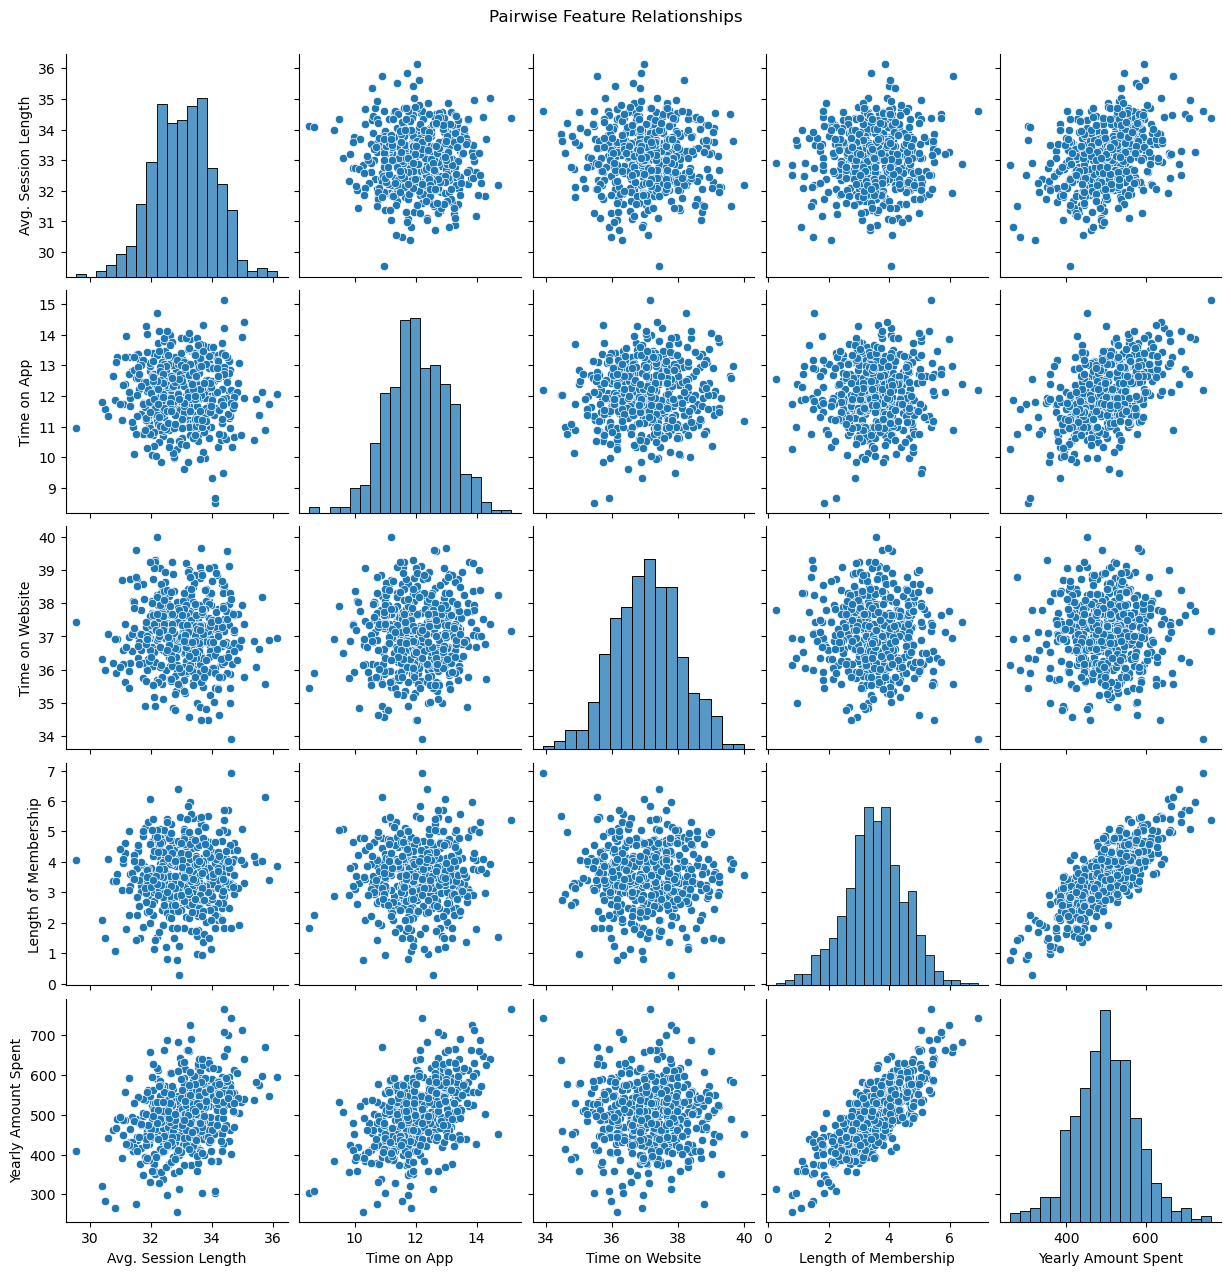

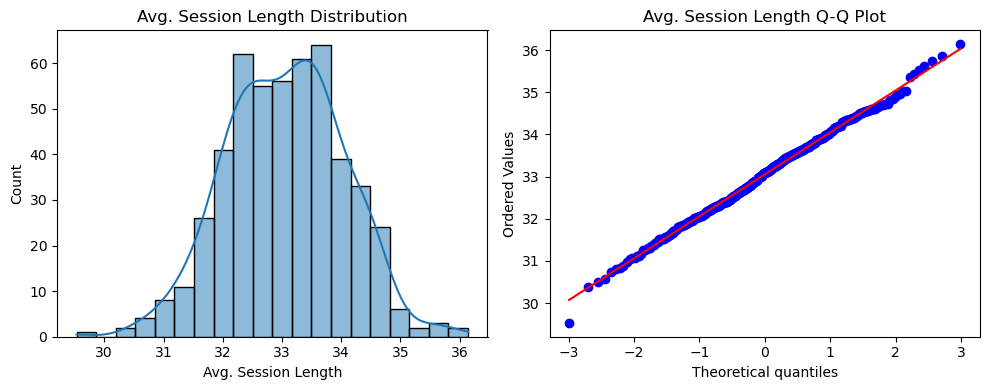

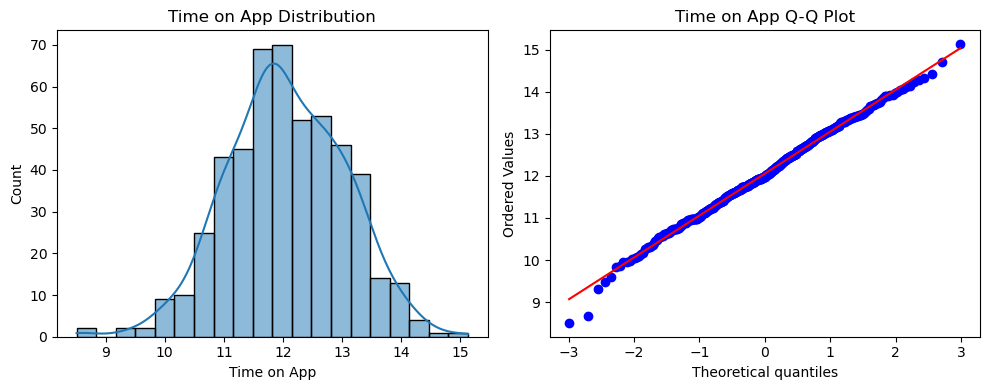

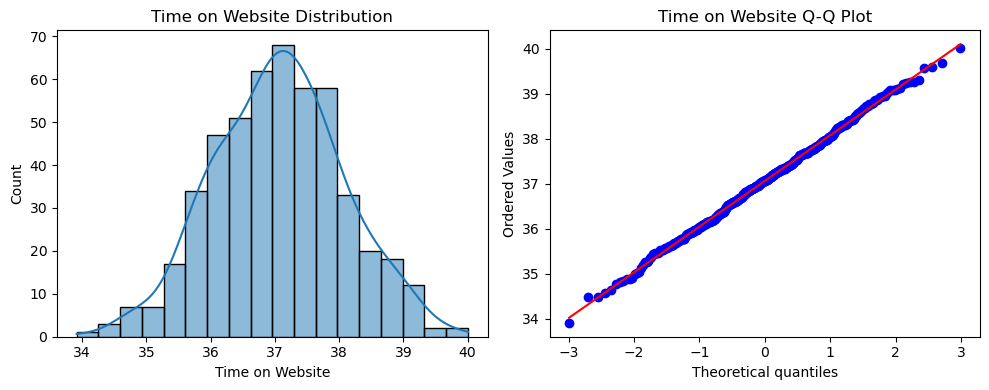

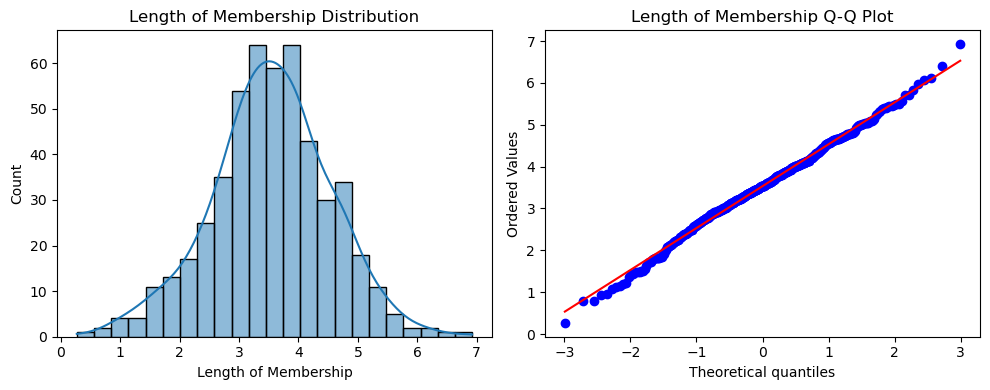

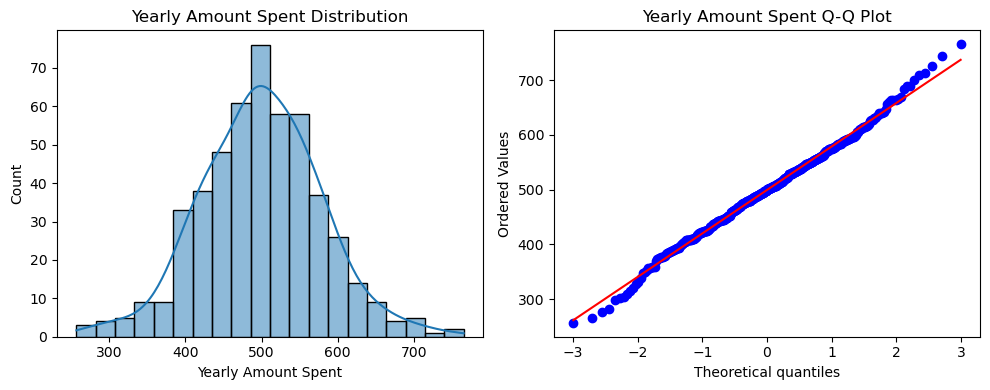


Normality Tests (Shapiro-Wilk):
Avg. Session Length: W=0.998, p=0.716
Time on App: W=0.997, p=0.555
Time on Website: W=0.998, p=0.936
Length of Membership: W=0.996, p=0.275
Yearly Amount Spent: W=0.996, p=0.264

Skewness/Kurtosis:
Avg. Session Length: Skew=-0.03, Kurtosis=-0.00
Time on App: Skew=-0.09, Kurtosis=0.11
Time on Website: Skew=0.01, Kurtosis=-0.11
Length of Membership: Skew=-0.11, Kurtosis=0.33
Yearly Amount Spent: Skew=0.03, Kurtosis=0.45


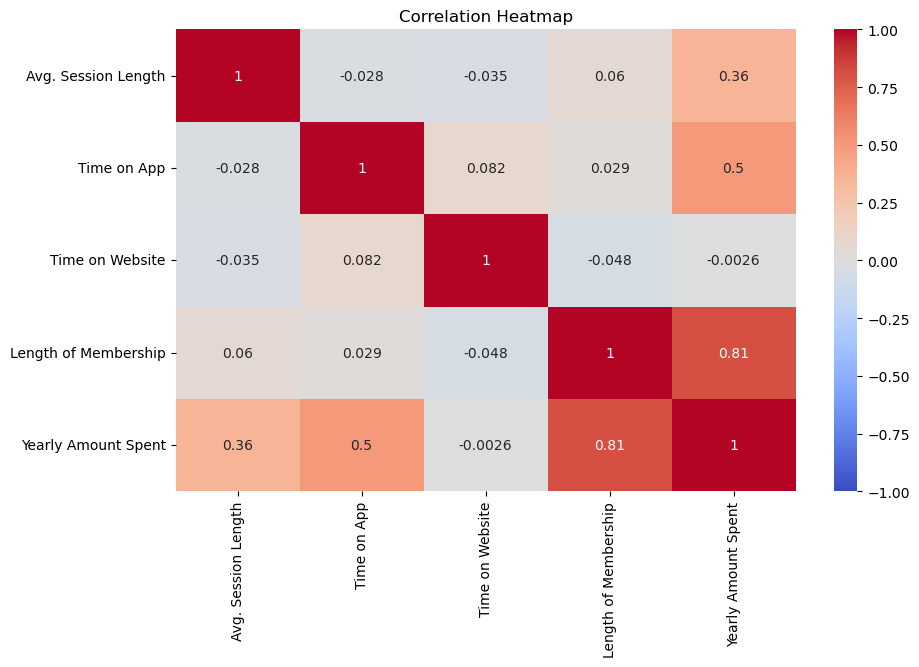

In [26]:
# --------------------------
# Import Libraries
# --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# --------------------------
# Load Data
# --------------------------
df = pd.read_csv('Ecommerce_Customers', sep=',', header='infer')

# --------------------------
# Basic Exploration
# --------------------------
print("First 5 rows:")
print(df.head())

print("\nDataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())

# --------------------------
# Visualizations
# --------------------------
# Pairplot for multivariate relationships
sns.pairplot(df[['Avg. Session Length', 'Time on App', 
                'Time on Website', 'Length of Membership',
                'Yearly Amount Spent']])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

# Distribution plots with normality indicators
numeric_cols = ['Avg. Session Length', 'Time on App', 
               'Time on Website', 'Length of Membership',
               'Yearly Amount Spent']

for col in numeric_cols:
    plt.figure(figsize=(10,4))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    
    # Q-Q Plot
    plt.subplot(1,2,2)
    stats.probplot(df[col], plot=plt)
    plt.title(f'{col} Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

# --------------------------
# Statistical Tests
# --------------------------
print("\nNormality Tests (Shapiro-Wilk):")
for col in numeric_cols:
    stat, p = stats.shapiro(df[col])
    print(f"{col}: W={stat:.3f}, p={p:.3f}")

print("\nSkewness/Kurtosis:")
for col in numeric_cols:
    skew = stats.skew(df[col])
    kurt = stats.kurtosis(df[col])
    print(f"{col}: Skew={skew:.2f}, Kurtosis={kurt:.2f}")

# Correlation analysis
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


Model Performance:
R² Score: 0.978
RMSE: 10.48
MAE: 8.56


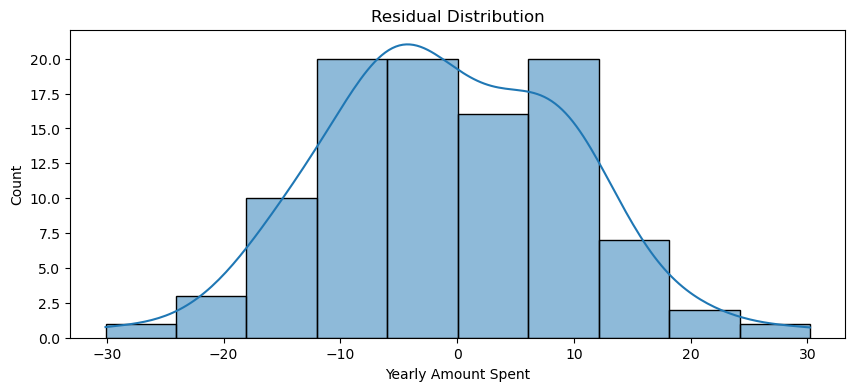


Feature Coefficients:
                Feature  Coefficient
3  Length of Membership    63.543211
1           Time on App    38.703501
0   Avg. Session Length    25.250381
2       Time on Website     0.315469


In [27]:
# --------------------------
# Data Preparation
# --------------------------
# Drop non-numeric columns
df_clean = df.drop(['Email', 'Address', 'Avatar'], axis=1)

# Define features and target
X = df_clean.drop('Yearly Amount Spent', axis=1)
y = df_clean['Yearly Amount Spent']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# Model Training
# --------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# --------------------------
# Model Evaluation
# --------------------------
y_pred = model.predict(X_test_scaled)

print("Model Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Coefficient interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)
